Mu Computed: 5.5956
Sigma Computed: 0.7593
Sigma Theoretical: 0.7593


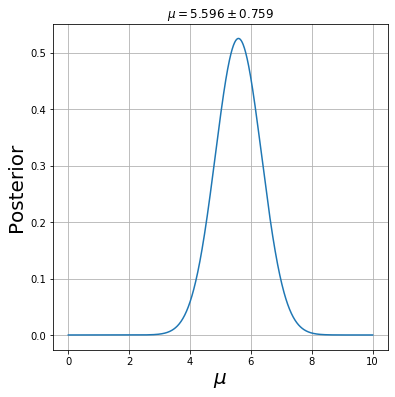

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x,mu,sg):
    return 1/(sg*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sg**2))

x = np.array([4.6, 6.0, 2.0, 5.8])
sigma = np.array([2.0, 1.5, 5.0, 1.0])

nm = 1000
mus = np.linspace(0,10,nm)
mu_min = min(mus)
mu_max = max(mus)
h = mus[1]-mus[0]

A = 1/(mu_max-mu_min)

like = []

for i in mus:
    pro = 1
    for j ,k  in zip(x,sigma):
        pro *= (gaussian(j,i,k))
    like.append(pro)
        
vero = np.array(like)
norm = np.sum(vero/A*h)
posterior = vero / (A * norm)
L = np.log(posterior)


ii = np.argmax(L)
mu_o = mus[ii]
L_pp = (L[2:-1] -2*L[1:-2] + L[0:-3])/(h**2)
sigma_C = 1/np.sqrt(-L_pp[ii])

sigma_T = 1/np.sqrt(np.sum(1/sigma**2))

print(r'Mu Computed: '+str(round(mu_o,4)))
print(r'Sigma Computed: '+str(round(sigma_C,4)))
print(r'Sigma Theoretical: '+str(round(sigma_T,4)))

fig = plt.figure(figsize=(6,6))
plt.grid()
plt.plot(mus,posterior)
plt.title(r'$\mu = '+str(round(mu_o,3))+' \pm'+str(round(sigma_C,3))+'$') 
plt.ylabel('Posterior',fontsize=20)
plt.xlabel(r'$\mu$',fontsize=20)
plt.savefig("mean.png")
plt.show()

In [2]:
mu_walk = [3]

n_iterations = 200000
for i in range(n_iterations):
    mu_prime = np.random.normal(mu_walk[i], 0.1)
    alpha = gaussian(mu_o,mu_prime,sigma_C)/gaussian(mu_o,mu_walk[i],sigma_C)
    if(alpha>=1.0):
        mu_walk.append(mu_prime)
    else:
        beta = np.random.rand(1)
        if(beta<=alpha):
            mu_walk.append(mu_prime)
        else:
            mu_walk.append(mu_walk[i])

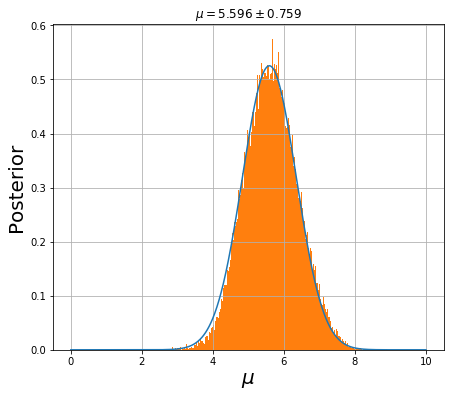

In [3]:
fig = plt.figure(figsize=(7,6))
plt.grid()
plt.plot(mus,posterior)
plt.title(r'$\mu = '+str(round(mu_o,3))+' \pm'+str(round(sigma_C,3))+'$') 
plt.ylabel('Posterior',fontsize=20)
plt.xlabel(r'$\mu$',fontsize=20)
count, bins, ignored = plt.hist(mu_walk, density=True, bins=1000)
plt.savefig("mean_metropolis.png")
plt.show()